Lets start our analysis. Firstly, lets download the kaggle dataset. I've chosen "Employee Salaries Analysis"

In [ ]:
import kagglehub
import shutil

# Download latest version
target_path = "C:\\Users\\chris\\Documents\\wage_analytics_project\\WageWise-Analytics"
path = kagglehub.dataset_download("sahirmaharajj/employee-salaries-analysis")

shutil.move(path, target_path)

print("Path to dataset files:", path)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. DATA OVERVIEW
load dataset with pandas and see head, columns, info and describe to get an idea of the data

In [6]:
import pandas as pd

df = pd.read_csv("2\\Employee_Salaries.csv")

In [7]:
df.head(10)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
5,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,98228.0000,518.80,998.28,21
6,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,82405.3864,549.20,0.00,18
7,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,93986.0000,1187.06,2452.94,N20
8,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,149464.1500,0.00,9021.82,18
9,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0000,0.00,0.00,N25


In [12]:
df.shape

(10291, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [10]:
df.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,10291.000000,10291.000000,10291.000000
mean,90312.165744,8081.288954,1533.882816
std,31240.842929,16491.833017,3209.041070
min,11147.240000,0.000000,0.000000
25%,70023.000000,0.000000,0.000000
50%,87328.000000,258.420000,0.000000
75%,108084.000000,9190.970000,1225.680000
max,292000.000000,227428.990000,20279.460000


In [11]:
df.shape

(10291, 8)

2. MISSING VALUES ANALYSIS

In [14]:
df.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

Missing values on Grade column, since it is an object-type column we drop those rows. No meaning in filling them with sth.

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

Decided that if we have less that 10 records on a Department we cannot fully drawn any concludions, since the data is so little. So we're dropping those rows / departments.

In [76]:
df = df.groupby('Department').filter(lambda x: len(x) > 10)

print(f"Unique departments after filtering: {df['Department'].nunique()}")

Unique departments after filtering: 32


3. DESCRIPTIVE STATISTICS: Did .describe() previously. 3 columns are float-type: Base_Salary	Overtime_Pay	Longevity_Pay

4. UNIVARIATE ANALYSIS


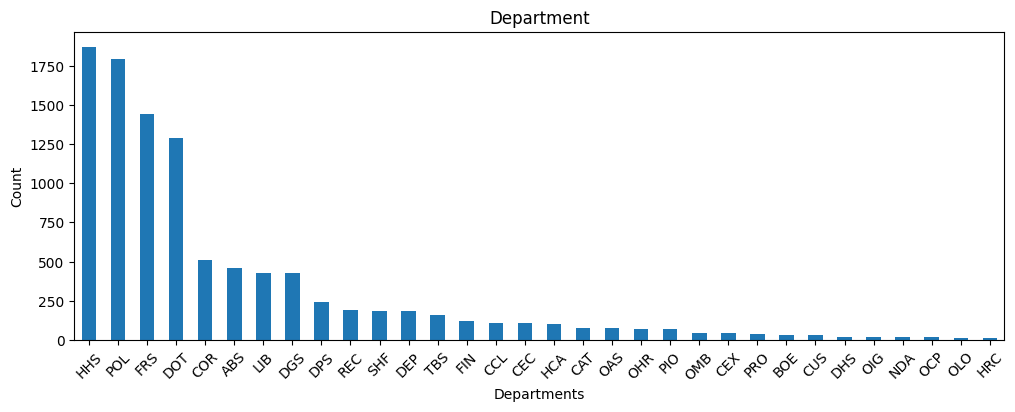

In [77]:
plt.figure(figsize=(12, 4))
df['Department'].value_counts().plot(kind='bar', title='Number of the Department')
plt.title('Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Most of our data comes from Department of Health and Human Services, Department of Police, Fire and Rescue Services and Department of Transportation

Lets make a graph showcasing the difference between base wage salary between men and women for each department. Specifically, lets see which departments have the biggest gap (more that 65-35)

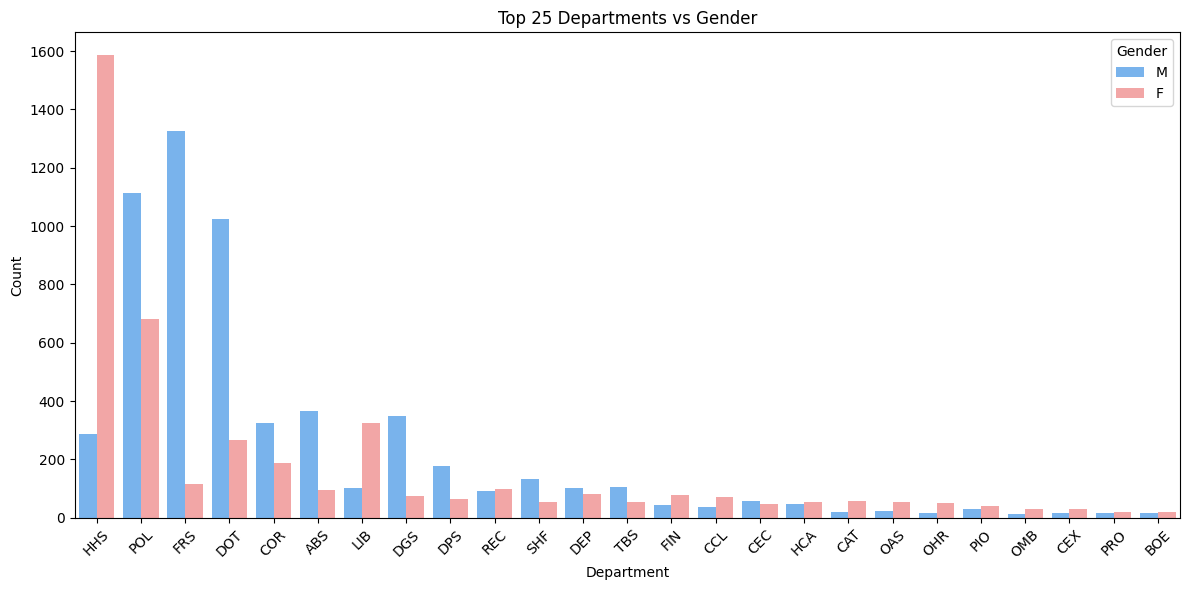

In [86]:
plt.figure(figsize=(12, 6))

#order = df['Department'].value_counts().index
order = df['Department'].value_counts().nlargest(25).index
gender_palette = {'F': '#ff9999', 'M': '#66b3ff'}

sns.countplot(x='Department', hue='Gender', data=df, order= order, palette=gender_palette)
plt.title('Top 25 Departments vs Gender')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Lets find the departments with the biggest gap between male and female. Making a gender_distribution_df, where rows are the different departments and columns are the genders. 
Decided that we're gonna take the data only if we have more than 10 rows on the department


In [80]:
gender_distribution_df = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

gender_distribution_df["F%"] = gender_distribution_df["F"] / (gender_distribution_df["F"] + gender_distribution_df["M"]) * 100
gender_distribution_df["M%"] = gender_distribution_df["M"] / (gender_distribution_df["F"] + gender_distribution_df["M"]) * 100

gender_distribution_df.head(5)

Gender,F,M,F%,M%
Department,,,,
ABS,96,366,20.779221,79.220779
BOE,19,15,55.882353,44.117647
CAT,57,21,73.076923,26.923077
CCL,71,37,65.740741,34.259259
CEC,46,59,43.809524,56.190476


Define "Big Gap" threshold is >65% of any one gender

In [81]:
big_gap_departments = gender_distribution_df[(gender_distribution_df["F%"] > 65) | (gender_distribution_df["M%"] > 65)].copy()
big_gap_departments["Gap_Severity"] = abs(big_gap_departments["F%"] - 50)
big_gap_departments = big_gap_departments.sort_values("Gap_Severity", ascending=False)
print(big_gap_departments.head(5))


balanced_departments = gender_distribution_df[(gender_distribution_df["F%"] <= 65) & (gender_distribution_df["M%"] <= 65)].copy()
print(balanced_departments.head(5))


Gender         F     M         F%         M%  Gap_Severity
Department                                                
FRS          115  1325   7.986111  92.013889     42.013889
HHS         1585   289  84.578442  15.421558     34.578442
DGS           74   350  17.452830  82.547170     32.547170
DOT          266  1023  20.636152  79.363848     29.363848
ABS           96   366  20.779221  79.220779     29.220779
Gender        F    M         F%         M%
Department                                
BOE          19   15  55.882353  44.117647
CEC          46   59  43.809524  56.190476
COR         188  325  36.647173  63.352827
CUS          19   11  63.333333  36.666667
DEP          83  102  44.864865  55.135135


Great, now graphs of the big gap departments, and a table for the balanced oned

In [82]:
dept_lookup = df[['Department', 'Department_Name']].drop_duplicates().sort_values('Department') # so we have full names for the departments

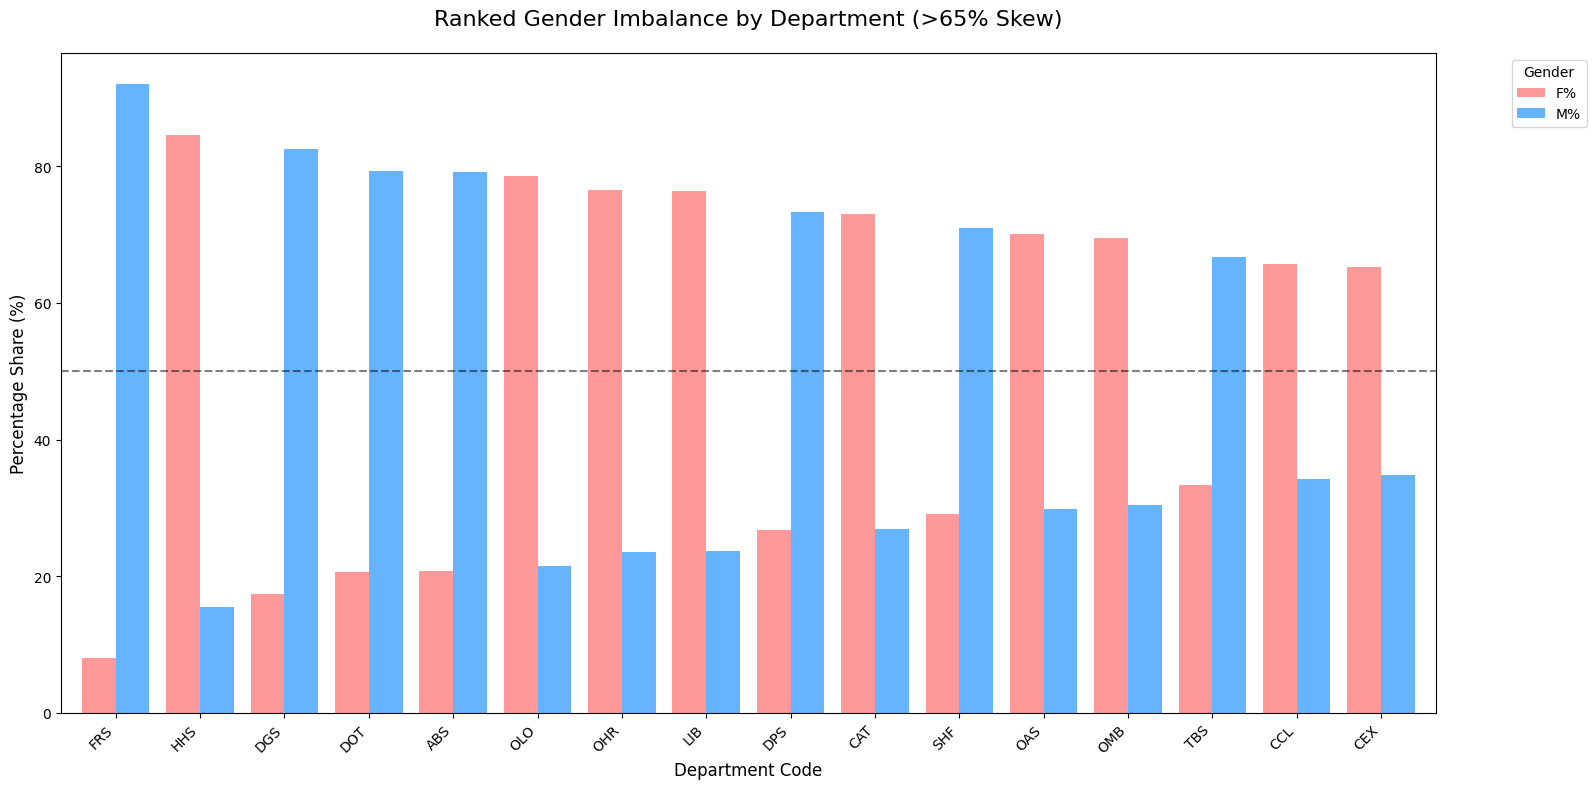

In [83]:
fig, ax = plt.subplots(figsize=(16, 8))

big_gap_departments[["F%", "M%"]].plot(
    kind='bar', 
    ax=ax, 
    color=['#ff9999','#66b3ff'],
    width=0.8
)

plt.title('Ranked Gender Imbalance by Department (>65% Skew)', fontsize=16, pad=20)
plt.xlabel('Department Code', fontsize=12)
plt.ylabel('Percentage Share (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=50, color='black', linestyle='--', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Gender')
plt.tight_layout()
plt.show()

The Departments with the biggest gaps are:

In [84]:
big_gap_departments.join(dept_lookup.set_index('Department'), on='Department', how='left')[["Department_Name", "F%", "M%"]]

,Department_Name,F%,M%
Department,,,
FRS,Fire and Rescue Services,7.986111,92.013889
HHS,Department of Health and Human Services,84.578442,15.421558
DGS,Department of General Services,17.452830,82.547170
DOT,Department of Transportation,20.636152,79.363848
ABS,Alcohol Beverage Services,20.779221,79.220779
OLO,Office of Legislative Oversight,78.571429,21.428571
OHR,Office of Human Resources,76.470588,23.529412
LIB,Department of Public Libraries,76.346604,23.653396
DPS,Department of Permitting Services,26.748971,73.251029


The balanced Departments are:

In [85]:
balanced_departments.join(dept_lookup.set_index('Department'), on='Department', how='left')[["Department_Name", "F%", "M%"]]

,Department_Name,F%,M%
Department,,,
BOE,Board of Elections,55.882353,44.117647
CEC,Community Engagement Cluster,43.809524,56.190476
COR,Correction and Rehabilitation,36.647173,63.352827
CUS,Community Use of Public Facilities,63.333333,36.666667
DEP,Department of Environmental Protection,44.864865,55.135135
DHS,Office of Emergency Management and Homeland Se...,42.857143,57.142857
FIN,Department of Finance,63.636364,36.363636
HCA,Department of Housing and Community Affairs,52.475248,47.524752
HRC,Office of Human Rights,45.454545,54.545455


** Could add some conclusions about the gaps and the balances. later.

Now that we looked at gender gaps in departments, we’re going to look at salaries and gender.

Lets make a graph of the Base, Overtime and Longetivity Average Salary of the Genders. Also we're gonna mark the highest avg and calculate the % difference

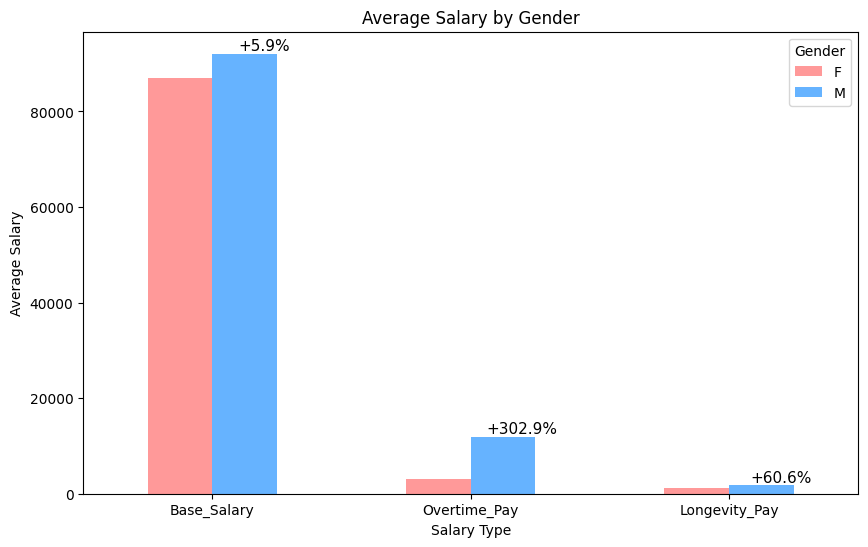

In [117]:
avg_salaries = df.groupby('Gender')[[
    'Base_Salary',
    'Overtime_Pay',
    'Longevity_Pay'
]].mean()
percent_diff = ((avg_salaries.loc['M'] - avg_salaries.loc['F']) / avg_salaries.loc['F']) * 100

ax = avg_salaries.T.plot(kind='bar', figsize=(10,6), color=['#ff9999','#66b3ff'])

plt.title('Average Salary by Gender')
plt.xlabel('Salary Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add +X% to highest bar of each category
for i, salary_type in enumerate(avg_salaries.columns):
    
    f_val = avg_salaries.loc['F', salary_type]
    m_val = avg_salaries.loc['M', salary_type]
    
    if m_val > f_val:
        higher_value = m_val
        x_position = i + 0.2   # male bar position
        gap = percent_diff[salary_type]
    else:
        higher_value = f_val
        x_position = i - 0.2   # female bar position
        gap = -percent_diff[salary_type]
    
    ax.text(x_position, higher_value,
            f'+{abs(gap):.1f}%',
            ha='center', va='bottom', fontsize=11)

plt.show()

plt.show()

Now this graph is for all the departments. It would be interesting to see the results in big-gap-departments and balanced ones

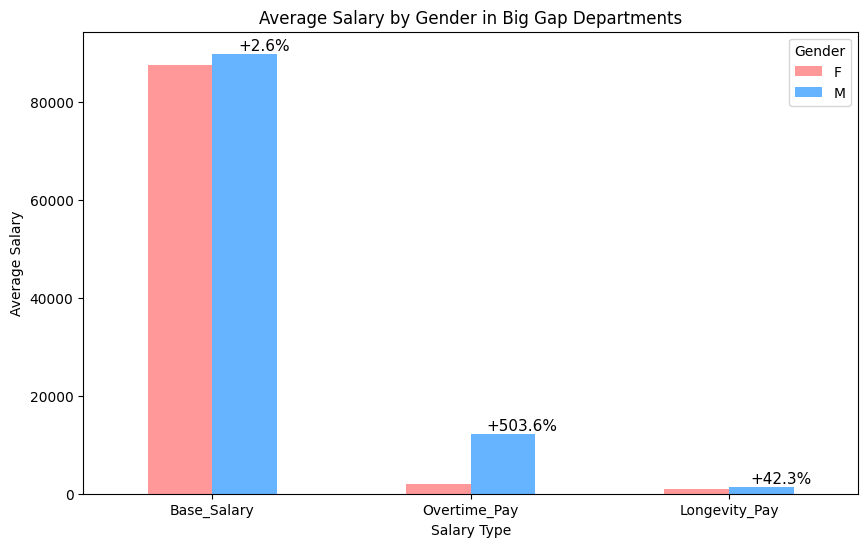

In [122]:
avg_salaries_big_gap = big_gap_departments.join(df.set_index('Department'), on='Department', how='left').groupby('Gender')[[
    'Base_Salary',
    'Overtime_Pay',
    'Longevity_Pay'
]].mean()
percent_diff = ((avg_salaries_big_gap.loc['M'] - avg_salaries_big_gap.loc['F']) / avg_salaries_big_gap.loc['F']) * 100

ax = avg_salaries_big_gap.T.plot(kind='bar', figsize=(10,6), color=['#ff9999','#66b3ff'])

plt.title('Average Salary by Gender in Big Gap Departments')
plt.xlabel('Salary Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add +X% to highest bar of each category
for i, salary_type in enumerate(avg_salaries_big_gap.columns):
    
    f_val = avg_salaries_big_gap.loc['F', salary_type]
    m_val = avg_salaries_big_gap.loc['M', salary_type]
    
    if m_val > f_val:
        higher_value = m_val
        x_position = i + 0.2   # male bar position
        gap = percent_diff[salary_type]
    else:
        higher_value = f_val
        x_position = i - 0.2   # female bar position
        gap = -percent_diff[salary_type]
    
    ax.text(x_position, higher_value,
            f'+{abs(gap):.1f}%',
            ha='center', va='bottom', fontsize=11)

plt.show()


Here we can see that in base salary we dont really have an imbalance in big-gap-departments. BUT, we have a huge overtime imbalance, as well as a bigger longevity imbalance. The thing we need to check is the difference in each department to conclude. 

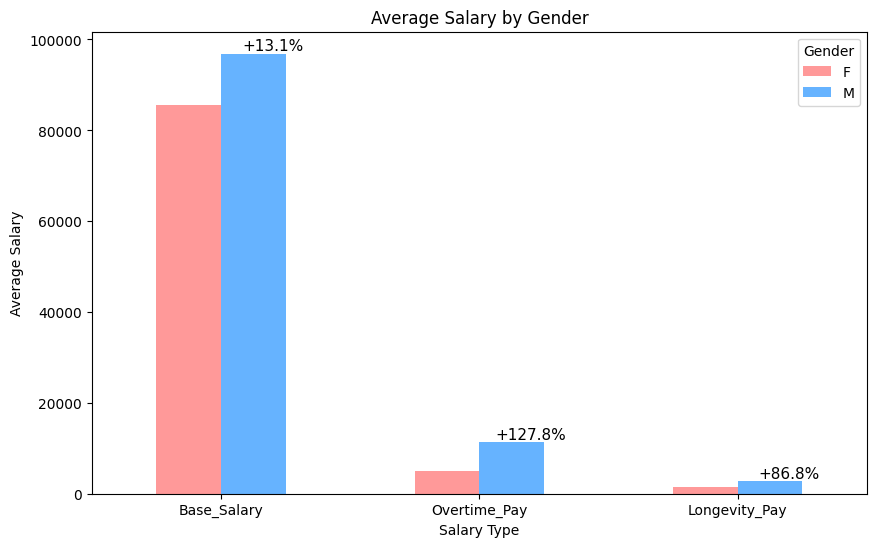

In [123]:
avg_salaries_balanced = balanced_departments.join(df.set_index('Department'), on='Department', how='left').groupby('Gender')[[
    'Base_Salary',
    'Overtime_Pay',
    'Longevity_Pay'
]].mean()
percent_diff = ((avg_salaries_balanced.loc['M'] - avg_salaries_balanced.loc['F']) / avg_salaries_balanced.loc['F']) * 100

ax = avg_salaries_balanced.T.plot(kind='bar', figsize=(10,6), color=['#ff9999','#66b3ff'])

plt.title('Average Salary by Gender')
plt.xlabel('Salary Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add +X% to highest bar of each category
for i, salary_type in enumerate(avg_salaries_balanced.columns):
    
    f_val = avg_salaries_balanced.loc['F', salary_type]
    m_val = avg_salaries_balanced.loc['M', salary_type]
    
    if m_val > f_val:
        higher_value = m_val
        x_position = i + 0.2   # male bar position
        gap = percent_diff[salary_type]
    else:
        higher_value = f_val
        x_position = i - 0.2   # female bar position
        gap = -percent_diff[salary_type]
    
    ax.text(x_position, higher_value,
            f'+{abs(gap):.1f}%',
            ha='center', va='bottom', fontsize=11)

plt.show()

In balanced-departments we have a mild larger imbalance in base salay, a relatively small overtime imbalance. But we have the biggest longetivity pay gap. Lets see

lets see those differences in each department specifically

Index(['Department', 'F', 'M', 'F%', 'M%', 'Gap_Severity', 'Department_Name',
       'Division', 'Gender', 'Base_Salary', 'Overtime_Pay', 'Longevity_Pay',
       'Grade'],
      dtype='object')


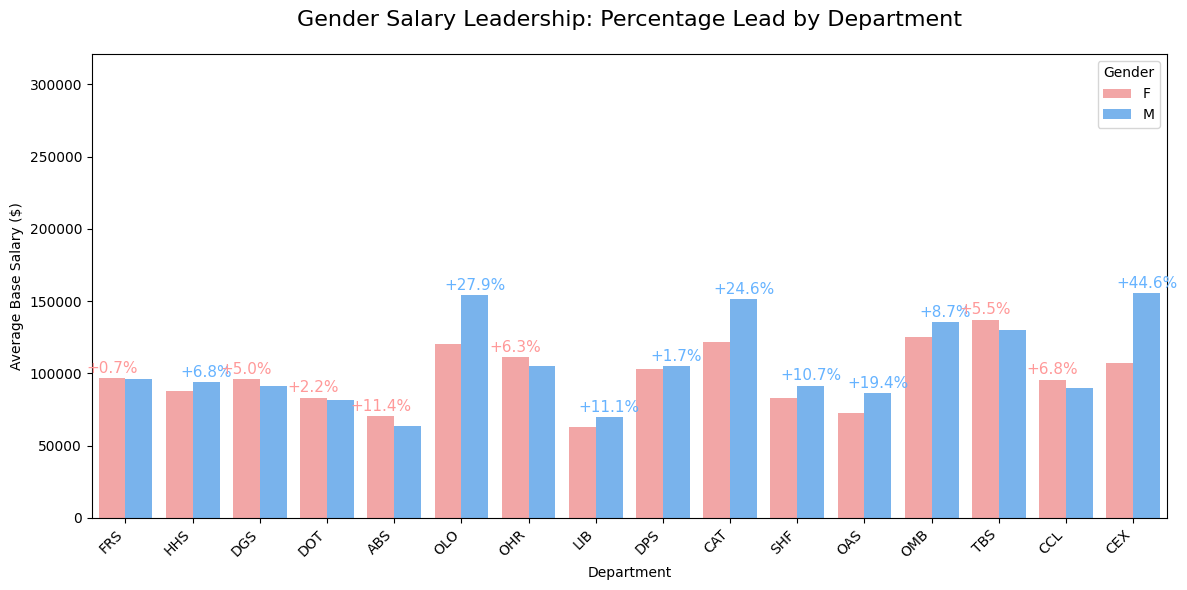

['OLO', 'CAT', 'OAS', 'CEX']


In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

high_gap_list = []

fig, ax = plt.subplots(figsize=(12, 6))

plot_data = big_gap_departments.join(
    df.set_index('Department'), 
    on='Department', 
    how='left'
).reset_index()

plot_data = plot_data.sort_values(by='Gap_Severity', ascending=False)
print(plot_data.columns)
order = plot_data['Department'].unique()

sns.barplot(
    ax=ax,
    x='Department', 
    y='Base_Salary', 
    hue='Gender', 
    data= plot_data, 
    order=order,
    palette=gender_palette,
    errorbar=None
)

bars_f = ax.containers[0]
bars_m = ax.containers[1]

for i in range(len(order)):
    h_f = bars_f[i].get_height()
    h_m = bars_m[i].get_height()
    
    if h_m > h_f:
        higher_bar = bars_m[i]
        percent_above = ((h_m - h_f) / h_f) * 100
        label_color = gender_palette['M']
    else:
        higher_bar = bars_f[i]
        percent_above = ((h_f - h_m) / h_m) * 100
        label_color = gender_palette['F']

    ax.text(
        higher_bar.get_x() + higher_bar.get_width()/2, 
        higher_bar.get_height() + 1500,
        f'+{percent_above:.1f}%', 
        ha='center', va='bottom', 
        fontsize=11,
        color=label_color
    )

    if percent_above >= 17:
        high_gap_list.append(order[i])

ax.set_title('Gender Salary Leadership: Percentage Lead by Department', fontsize=16, pad=20)
ax.set_ylabel('Average Base Salary ($)')
ax.set_ylim(0, max(plot_data['Base_Salary']) * 1.1)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

plt.show()

print(high_gap_list)

In [161]:
for dept in high_gap_list:
    print( df[df['Department'] == dept]['Department_Name'].iloc[0] )

Office of Legislative Oversight
County Attorney's Office
Office of Animal Services
Offices of the County Executive


The most significant salary disparities in the organization are exclusively male-dominated.

Index(['Department', 'F', 'M', 'F%', 'M%', 'Gap_Severity', 'Department_Name',
       'Division', 'Gender', 'Base_Salary', 'Overtime_Pay', 'Longevity_Pay',
       'Grade'],
      dtype='object')


C:\Users\chris\AppData\Local\Temp\ipykernel_3356\2532188541.py:42: RuntimeWarning: invalid value encountered in scalar divide
  percent_above = ((h_f - h_m) / h_m) * 100
C:\Users\chris\AppData\Local\Temp\ipykernel_3356\2532188541.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  percent_above = ((h_f - h_m) / h_m) * 100


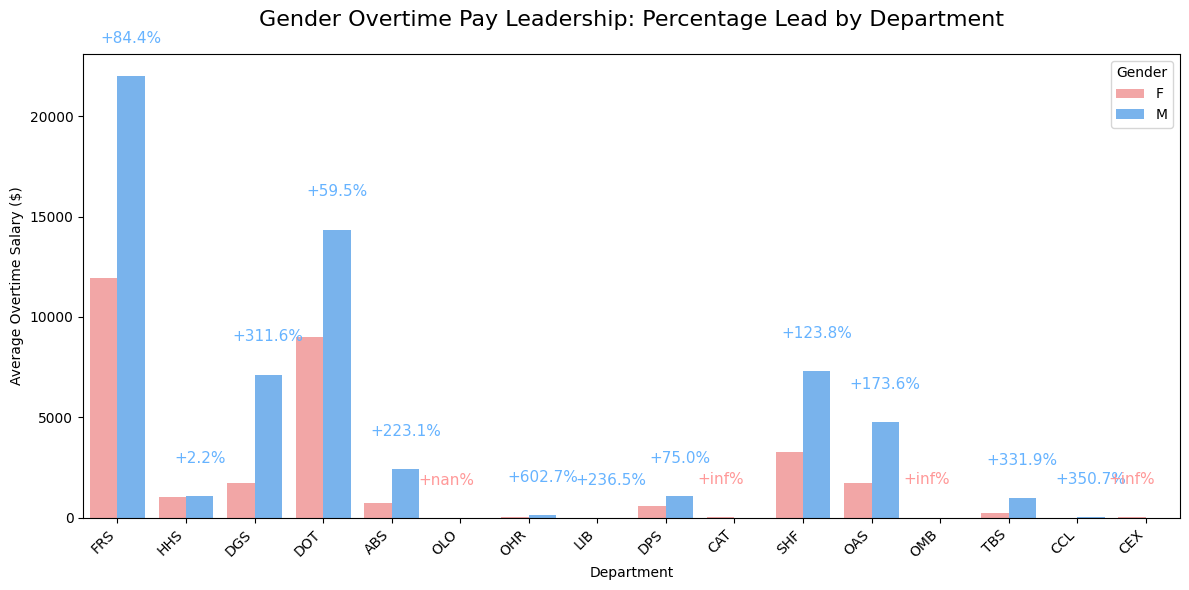

['FRS', 'DGS', 'DOT', 'ABS', 'OHR', 'LIB', 'DPS', 'CAT', 'SHF', 'OAS', 'OMB', 'TBS', 'CCL', 'CEX']


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

high_gap_list = []

fig, ax = plt.subplots(figsize=(12, 6))

plot_data = big_gap_departments.join(
    df.set_index('Department'), 
    on='Department', 
    how='left'
).reset_index()

plot_data = plot_data.sort_values(by='Gap_Severity', ascending=False)
print(plot_data.columns)
order = plot_data['Department'].unique()

sns.barplot(
    ax=ax,
    x='Department', 
    y='Overtime_Pay', 
    hue='Gender', 
    data= plot_data, 
    order=order,
    palette=gender_palette,
    errorbar=None
)

bars_f = ax.containers[0]
bars_m = ax.containers[1]

for i in range(len(order)):
    h_f = bars_f[i].get_height()
    h_m = bars_m[i].get_height()
    
    if h_m > h_f:
        higher_bar = bars_m[i]
        percent_above = ((h_m - h_f) / h_f) * 100
        label_color = gender_palette['M']
    else:
        higher_bar = bars_f[i]
        percent_above = ((h_f - h_m) / h_m) * 100
        label_color = gender_palette['F']

    ax.text(
        higher_bar.get_x() + higher_bar.get_width()/2, 
        higher_bar.get_height() + 1500,
        f'+{percent_above:.1f}%', 
        ha='center', va='bottom', 
        fontsize=11,
        color=label_color
    )

    if percent_above >= 17:
        high_gap_list.append(order[i])

ax.set_title('Gender Overtime Pay Leadership: Percentage Lead by Department', fontsize=16, pad=20)
ax.set_ylabel('Average Overtime Salary ($)')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

plt.show()

print(high_gap_list)

Now lets look into the ba;anced departments

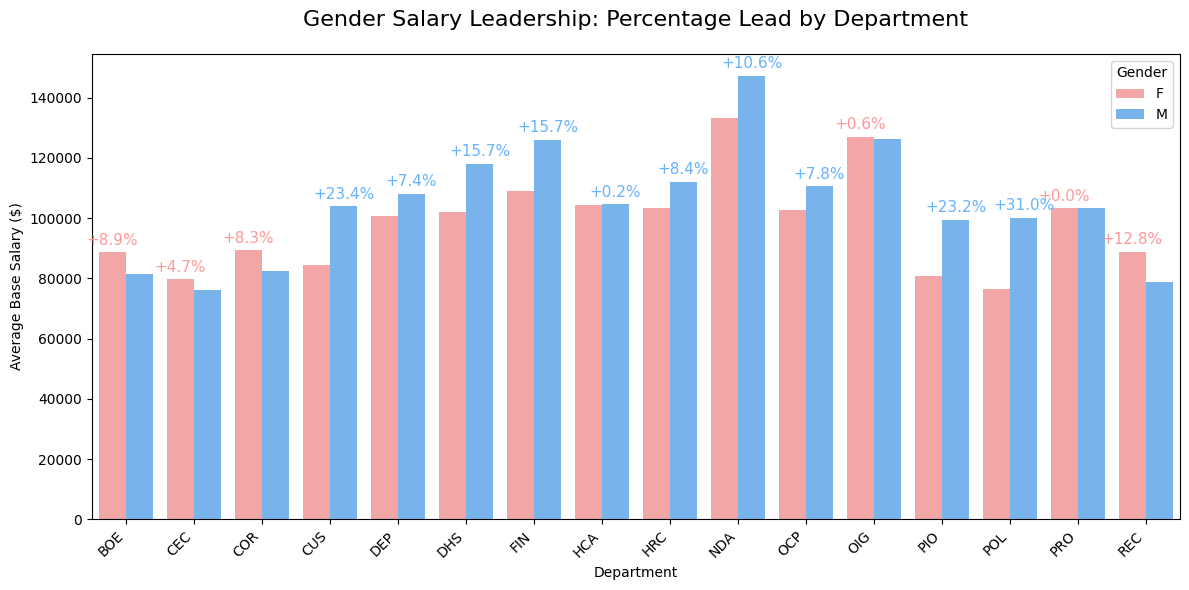

['CUS', 'PIO', 'POL']


In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

high_gap_list = []

fig, ax = plt.subplots(figsize=(12, 6))

plot_data = balanced_departments.join(
    df.set_index('Department'), 
    on='Department', 
    how='left'
).reset_index()

order = plot_data['Department'].unique()

sns.barplot(
    ax=ax,
    x='Department', 
    y='Base_Salary', 
    hue='Gender', 
    data= plot_data, 
    order=order,
    palette=gender_palette,
    errorbar=None
)

bars_f = ax.containers[0]
bars_m = ax.containers[1]

for i in range(len(order)):
    h_f = bars_f[i].get_height()
    h_m = bars_m[i].get_height()
    
    if h_m > h_f:
        higher_bar = bars_m[i]
        percent_above = ((h_m - h_f) / h_f) * 100
        label_color = gender_palette['M']
    else:
        higher_bar = bars_f[i]
        percent_above = ((h_f - h_m) / h_m) * 100
        label_color = gender_palette['F']

    ax.text(
        higher_bar.get_x() + higher_bar.get_width()/2, 
        higher_bar.get_height() + 1500,
        f'+{percent_above:.1f}%', 
        ha='center', va='bottom', 
        fontsize=11,
        color=label_color
    )

    if percent_above >= 17:
        high_gap_list.append(order[i])

ax.set_title('Gender Salary Leadership: Percentage Lead by Department', fontsize=16, pad=20)
ax.set_ylabel('Average Base Salary ($)')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

plt.show()

print(high_gap_list)

In [173]:
for dept in high_gap_list:
    print( df[df['Department'] == dept]['Department_Name'].iloc[0] )

Community Use of Public Facilities
Office of Public Information
Department of Police


Even in fields with more balanced representation, the most substantial salary disparities consistently favor men, with gaps often doubling or tripling the magnitude of any female-led leads.

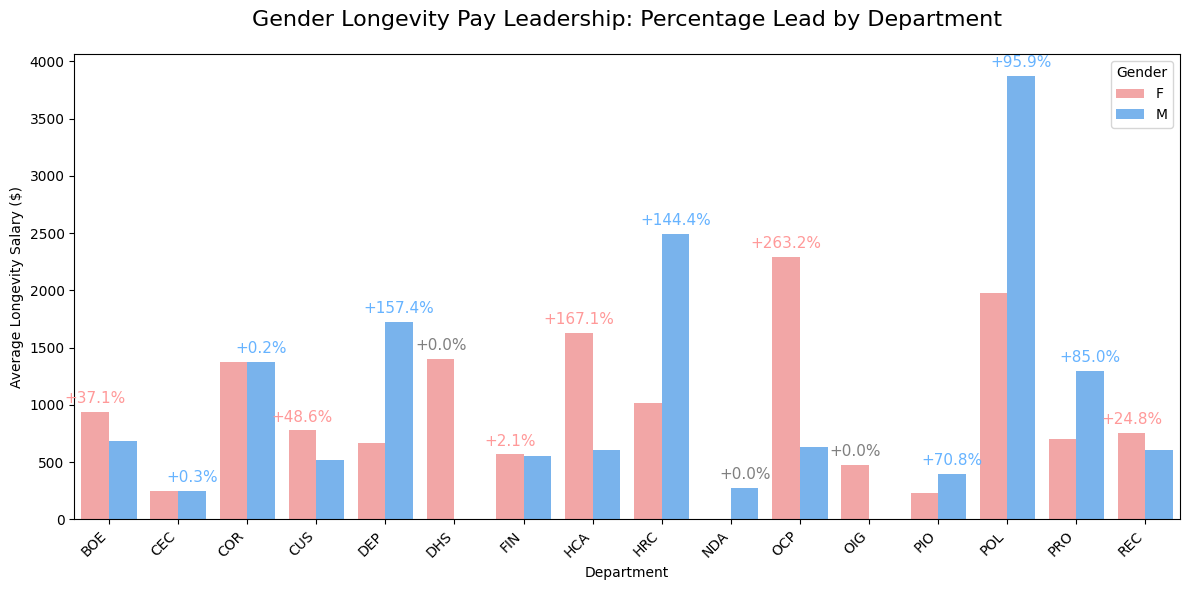

['BOE', 'CUS', 'DEP', 'HCA', 'HRC', 'OCP', 'PIO', 'POL', 'PRO', 'REC']


In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

high_gap_list = []

fig, ax = plt.subplots(figsize=(12, 6))

plot_data = balanced_departments.join(
    df.set_index('Department'), 
    on='Department', 
    how='left'
).reset_index()

order = plot_data['Department'].unique()

sns.barplot(
    ax=ax,
    x='Department', 
    y='Longevity_Pay', 
    hue='Gender', 
    data= plot_data, 
    order=order,
    palette=gender_palette,
    errorbar=None
)

bars_f = ax.containers[0]
bars_m = ax.containers[1]

for i in range(len(order)):
    h_f = bars_f[i].get_height()
    h_m = bars_m[i].get_height()

    if h_f == 0 or h_m == 0:
        # If one is zero, we can't do a percentage comparison
        higher_bar = bars_m[i] if h_m > h_f else bars_f[i]
        label_text = "N/A"
        label_color = "gray"
        percent_above = 0 # Default to 0 so the 'if' below doesn't crash

    else:
    
        if h_m > h_f:
            higher_bar = bars_m[i]
            percent_above = ((h_m - h_f) / h_f) * 100
            label_color = gender_palette['M']
        else:
            higher_bar = bars_f[i]
            percent_above = ((h_f - h_m) / h_m) * 100
            label_color = gender_palette['F']

    ax.text(
        higher_bar.get_x() + higher_bar.get_width()/2, 
        higher_bar.get_height() + 50,
        f'+{percent_above:.1f}%', 
        ha='center', va='bottom', 
        fontsize=11,
        color=label_color
    )

    if percent_above >= 17:
        high_gap_list.append(order[i])

ax.set_title('Gender Longevity Pay Leadership: Percentage Lead by Department', fontsize=16, pad=20)
ax.set_ylabel('Average Longevity Salary ($)')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

plt.show()

print(high_gap_list)

In [175]:
for dept in high_gap_list:
    print( df[df['Department'] == dept]['Department_Name'].iloc[0] )

Department of Transportation
Alcohol Beverage Services
Office of Legislative Oversight
Department of Public Libraries
Department of Permitting Services
County Attorney's Office
Office of Management and Budget
County Council
Offices of the County Executive
